In [29]:
import pandas as pd
data = pd.read_csv("/content/MSFT.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2017-12-01,83.599998,84.809998,83.220001,84.260002,78.978004,29532100
1,2017-12-04,84.419998,84.430000,80.699997,81.080002,75.997337,39094900
2,2017-12-05,81.339996,82.680000,80.980003,81.589996,76.475357,26152300
3,2017-12-06,81.550003,83.139999,81.430000,82.779999,77.590767,26162100
4,2017-12-07,82.540001,82.800003,82.000000,82.489998,77.318954,23184500


In [30]:
data['Date'] =pd.to_datetime(data['Date'])
data.index= data['Date']

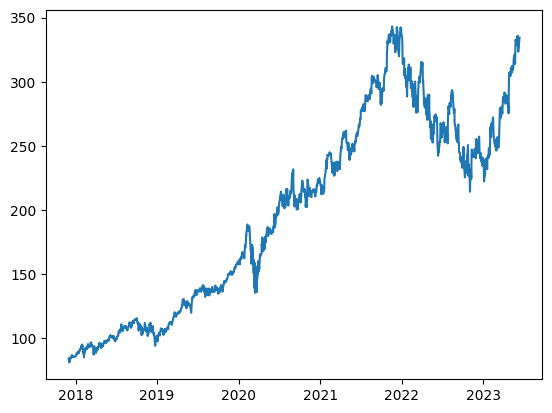

In [31]:
import matplotlib.pyplot as plt
plt.plot(data.index,data['Close'])

In [32]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression


In [33]:
# 2. Đọc file dữ liệu chứng khoán DELL và chia train test validate theo tỉ lệ 7:1:2
df = pd.read_csv('/content/MSFT.csv')
df = df[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index



# Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.2 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [34]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [35]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
fit = model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4891.892, Time=1.59 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4957.574, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4905.109, Time=0.12 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4908.363, Time=0.16 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4960.397, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4909.060, Time=0.45 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=4909.069, Time=0.90 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=4909.707, Time=2.15 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=4906.085, Time=7.99 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4907.071, Time=0.66 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4905.603, Time=5.04 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=4911.070, Time=0.90 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=inf, Time=8.26 sec
 ARIMA(2,1,2)(0,0,0)[0]             : AIC=4895.913, Time=1.64 sec

Best model:  ARIMA(2,1,2)(0,0,0)[0] i

In [36]:
train_data.index

RangeIndex(start=0, stop=973, step=1)

In [37]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [38]:

from datetime import timedelta

In [39]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
#last_index =  df.index[-1]
last_index=len(df)
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[296.97611175 296.8207698  297.29241206 297.4028084  297.58516286
 297.9626072  297.93741154 298.43876093 298.38223735 298.82821787
 298.89563116 299.17538713 299.42172561 299.53796406 299.90980264
 299.95292707 300.34056805 300.42102616 300.72981481 300.9141636
 301.11235664 301.39676242 301.51914552 301.84658071 301.96139155
 302.26385359 302.42875351 302.66633596 302.89955318 303.0759521 ]


In [40]:
# 7. Đánh giá độ chính xác validate, test
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)


Validation RMSE: 46.167644718645995
Testing RMSE: 65.97254434654695


RMSE thường được sử dụng để đánh giá độ chính xác của mô hình dự đoán với các giá trị liên tục, như giá cổ phiếu, điểm số, nhiệt độ, v.v. Giá trị RMSE càng nhỏ, mô hình dự đoán càng chính xác. Vậy với dữ liệu này mô hình Arima chính xác hơn

Validation RMSE: 46.167644718645995
Testing RMSE: 65.97254434654695
Validation MAE: 40.930302392137804
Testing MAE: 54.97903208163895
Validation MAPE: 0.1608105810590438
Testing MAPE: 0.2107320829941133


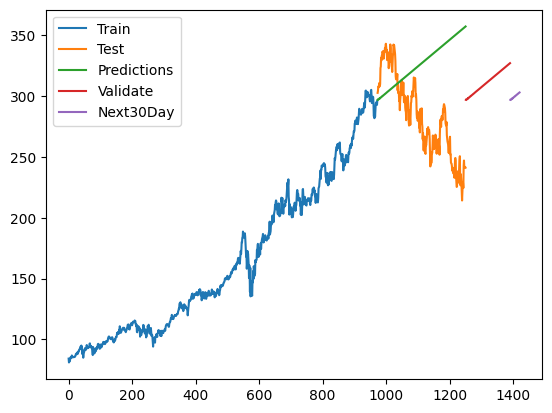

In [41]:


# 8. Tính RMSE, MAE, MAPE
valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
valid_mae= np.mean(np.abs(y_pred_val - y_val))
test_mae= np.mean(np.abs(y_pred - y_test))
valid_mape= np.mean(np.abs((y_pred_val - y_val) / y_val))
test_mape= np.mean(np.abs((y_pred - y_test) /y_test))
print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)
print('Validation MAE:', valid_mae)
print('Testing MAE:', test_mae)
print('Validation MAPE:', valid_mape)
print('Testing MAPE:', test_mape)

# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Validate','Next30Day'])
plt.show()

In [42]:
test_data.index

RangeIndex(start=973, stop=1251, step=1)